In [1]:
from ResponseFct import *
%matplotlib inline

# Computing Apparent Resistivity

In this app, we compute apparent resistivity using the response curves for a two-loop Frequency domain system for a two-layer earth. 

<img src="./ResponseFct.png"> </img>

Assuming the coil spacing $s \ll \delta$, where $\delta$ is the skin depth, the apparent conductivity is given by

$$
\sigma_a = \int_0^\infty \phi(z) \sigma(z) dz
$$

Where 
 - $\sigma_a$ is the apparent conductivity
 - $\phi$ is the response function
 - $\sigma$ is the conductivity structure

See the GPG for more: 
http://gpg.geosci.xyz/en/latest/content/electromagnetics/dual_loop_systems.html

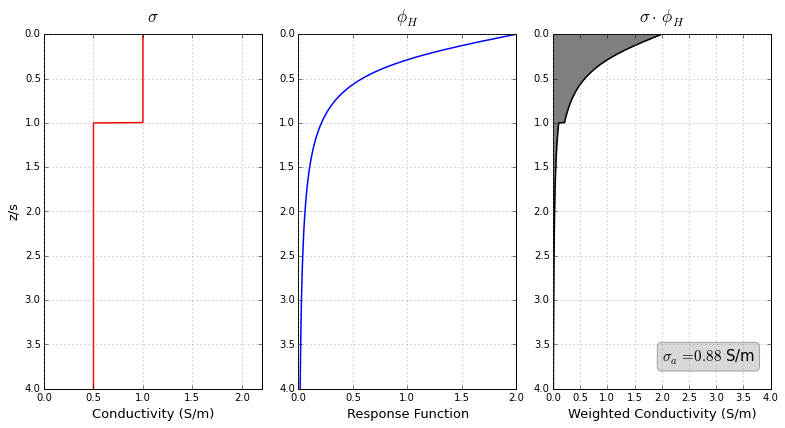

In [2]:
app = interactive_responseFct()
app